In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import folium as fol
import folium
from folium import plugins
from matplotlib import pyplot, transforms
from matplotlib.pyplot import show 
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import vincent as vin
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import tree

vin.core.initialize_notebook()

In [2]:
df_detenciones = pd.read_csv("00_DETENCIONES_ E_INVESTIGADOS_DE_GRUPO_PENAL.csv")
df_hechos_conocidos = pd.read_csv("01_HECHOS_CONOCIDOS_GRUPO_PENAL.csv")
df_victimizaciones = pd.read_csv("02_VICTIMIZACIONES_GRUPO_PENAL.csv")
df_hechos_esclarecidos = pd.read_csv("03_HECHOS_ESCLARECIDOS_GRUPO_PENAL.csv")

In [3]:
df_detenciones.head()

,Comunidad,Grupo Penal,Rango Edad,Sexo,Año,Detenciones e investigados
0,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2019,85.0
1,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2018,53.0
2,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2017,86.0
3,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2016,38.0
4,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2015,94.0


In [4]:
df_detenciones.shape

(20160, 6)

In [5]:
df_hechos_conocidos.head()

,Comunidad,Grupo Penal,Año,Hechos conocidos
0,Total Nacional,Acceso e interceptación ilícita,2019,4004.0
1,Total Nacional,Acceso e interceptación ilícita,2018,3384.0
2,Total Nacional,Acceso e interceptación ilícita,2017,3150.0
3,Total Nacional,Acceso e interceptación ilícita,2016,3243.0
4,Total Nacional,Acceso e interceptación ilícita,2015,2893.0


In [6]:
df_hechos_conocidos.shape

(1584, 4)

In [7]:
df_victimizaciones.head()

,Comunidad,Grupo Penal,Rango Edad,Sexo,Año,Victimizaciones
0,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2019,101.0
1,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2018,89.0
2,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2017,79.0
3,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2016,114.0
4,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2015,61.0


In [8]:
df_victimizaciones.shape

(22176, 6)

In [9]:
df_hechos_esclarecidos.head()

,Comunidad,Grupo Penal,Año,Hechos esclarecidos
0,Total Nacional,Acceso e interceptación ilícita,2019,998.0
1,Total Nacional,Acceso e interceptación ilícita,2018,999.0
2,Total Nacional,Acceso e interceptación ilícita,2017,819.0
3,Total Nacional,Acceso e interceptación ilícita,2016,845.0
4,Total Nacional,Acceso e interceptación ilícita,2015,724.0


In [10]:
df_hechos_esclarecidos.shape

(1584, 4)

In [11]:
#mezclar y salvar nuevo dataframe de detenciones y victimizaciones
df_detenc_victim = pd.merge(df_detenciones, df_victimizaciones, on=["Comunidad", "Grupo Penal", "Rango Edad", "Sexo", "Año"])
df_detenc_victim.to_csv("02_DETENCIONES_VICTIMIZACIONES_PENAL.csv", index=False)

In [12]:
#mezclar y salvar nuevo dataframe de hechos conocidos y esclarecidos
df_conocidos_esclarecidos=pd.merge(df_hechos_conocidos, df_hechos_esclarecidos, on=["Comunidad", "Grupo Penal", "Año"])
df_conocidos_esclarecidos.to_csv("02_HECHOS_CONOCIDOS_ESCLARECIDOS_PENAL.csv", index=False)

In [13]:
df_detenc_victim.head()

,Comunidad,Grupo Penal,Rango Edad,Sexo,Año,Detenciones e investigados,Victimizaciones
0,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2019,85.0,101.0
1,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2018,53.0,89.0
2,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2017,86.0,79.0
3,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2016,38.0,114.0
4,Total Nacional,Acceso e interceptación ilícita,< 18,Masculino,2015,94.0,61.0


#### Son un total de 20160 registros, la media de 2015, el desvío 2.58 por año

In [14]:
df_detenc_victim.describe()

,Año,Detenciones e investigados,Victimizaciones
count,20160.000000,20160.000000,20160.000000
mean,2015.000000,5.308333,74.684871
std,2.582053,31.548625,683.489811
min,2011.000000,0.000000,0.000000
25%,2013.000000,0.000000,0.000000
50%,2015.000000,0.000000,1.000000
75%,2017.000000,2.000000,13.000000
max,2019.000000,1511.000000,36003.000000


In [15]:
df_conocidos_esclarecidos.head()

,Comunidad,Grupo Penal,Año,Hechos conocidos,Hechos esclarecidos
0,Total Nacional,Acceso e interceptación ilícita,2019,4004.0,998.0
1,Total Nacional,Acceso e interceptación ilícita,2018,3384.0,999.0
2,Total Nacional,Acceso e interceptación ilícita,2017,3150.0,819.0
3,Total Nacional,Acceso e interceptación ilícita,2016,3243.0,845.0
4,Total Nacional,Acceso e interceptación ilícita,2015,2893.0,724.0


#### Son un total de 1584 registros, la media de 2015, el desvío 2.58 por año

In [16]:
df_conocidos_esclarecidos.describe()

,Año,Hechos conocidos,Hechos esclarecidos
count,1584.000000,1584.000000,1584.000000
mean,2015.000000,1066.623737,237.936869
std,2.582804,7326.303449,1045.817059
min,2011.000000,0.000000,0.000000
25%,2013.000000,11.000000,3.000000
50%,2015.000000,57.000000,20.000000
75%,2017.000000,253.000000,110.500000
max,2019.000000,192375.000000,18712.000000


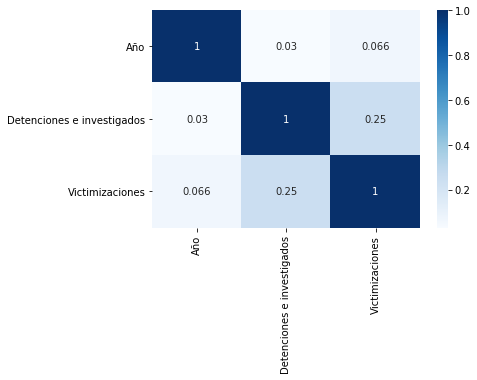

In [17]:
sns.heatmap(df_detenc_victim[["Comunidad", "Grupo Penal", "Rango Edad", "Sexo", "Año","Detenciones e investigados","Victimizaciones"]].corr(), annot=True, cmap="Blues")

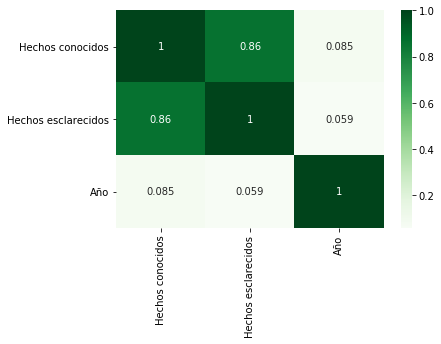

In [18]:
sns.heatmap(df_conocidos_esclarecidos[["Hechos conocidos","Hechos esclarecidos","Comunidad","Grupo Penal","Año"]].corr(), annot=True, cmap="Greens")

In [19]:
totales=df_detenc_victim[df_detenc_victim["Comunidad"]!="Total Nacional"].groupby(["Comunidad"])["Detenciones e investigados"].sum()

### La comunidad con más detenciones  e investigados es Andalucía con un 20,7% (2011-2019)

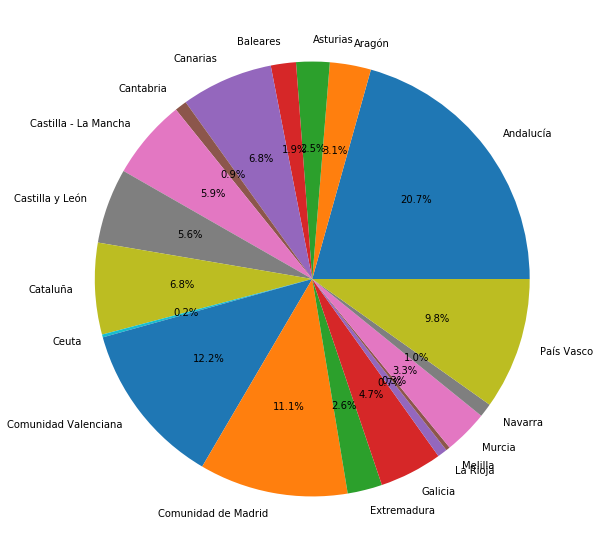

In [20]:
plt.figure(figsize=(15,10))
plt.pie(totales, labels = totales.index, autopct = '%1.1f%%')  
plt.show() 


In [21]:
totales1=df_conocidos_esclarecidos[df_conocidos_esclarecidos["Comunidad"]!="Total Nacional"].groupby(["Comunidad"])["Hechos conocidos"].sum()

### La comunidad con más hechos conocidos es Cataluña con un 17,5% (2011-2019)

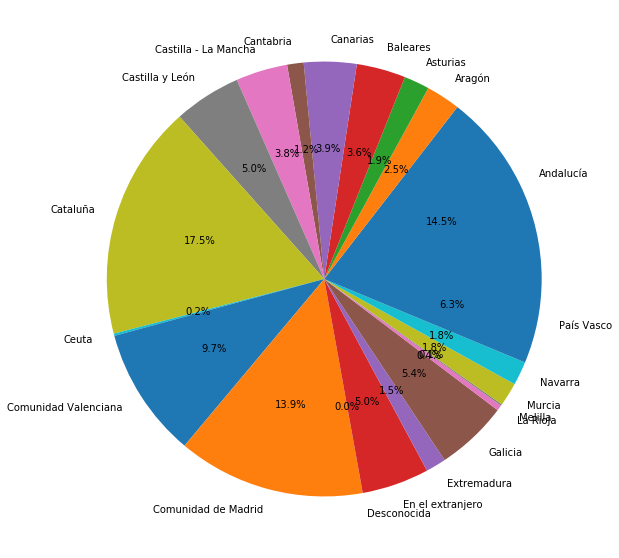

In [22]:
plt.figure(figsize=((15,10)))
plt.pie(totales1, labels = totales1.index, autopct = '%1.1f%%')  
plt.show() 

### La comunidad con más hechos esclarecidos es Andalucía con un 22,6%  (2011-2019)

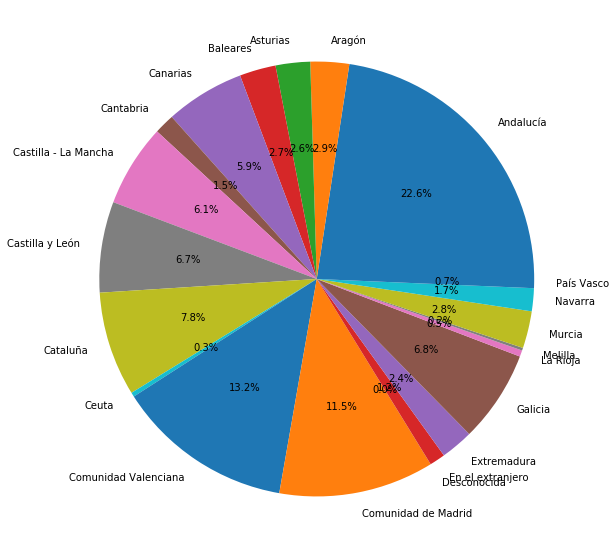

In [23]:
totales2=df_conocidos_esclarecidos[df_conocidos_esclarecidos["Comunidad"]!="Total Nacional"].groupby(["Comunidad"])["Hechos esclarecidos"].sum()

plt.figure(figsize=(15,10))
plt.pie(totales2, labels = totales2.index, autopct = '%1.1f%%')  
plt.show() 

### Las detenciones e investigado han aumentado en los ultimos años en especial el 2019 periodo(2011-2019)

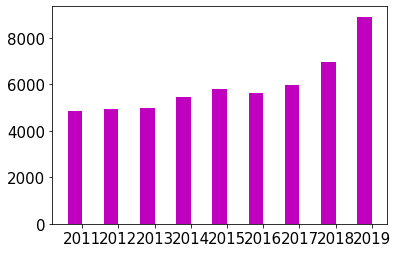

In [24]:
totales_0=df_detenc_victim[df_detenc_victim["Comunidad"]!="Total Nacional"].groupby(["Año"])["Detenciones e investigados"].sum().reset_index()

fig, ax = plt.subplots()
etiquetas= totales_0["Año"].unique()

valores=totales_0["Detenciones e investigados"]
x = np.arange(len(etiquetas)) 

ancho=0.4
plt.bar(x - ancho/2, valores, ancho, color="m")

ax.set_xticks(x)
ax.set_xticklabels(etiquetas)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()

### El número de victimizaciones va en aumento en especial en el año 2019, periodo(2011-2019)

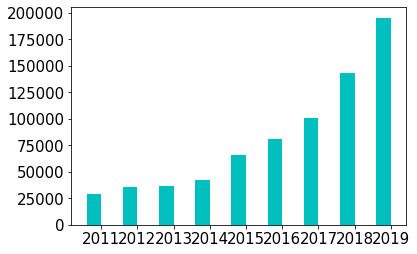

In [25]:
totales_0=df_detenc_victim[df_detenc_victim["Comunidad"]!="Total Nacional"].groupby(["Año"])["Victimizaciones"].sum().reset_index()

fig, ax = plt.subplots()
etiquetas= totales_0["Año"].unique()

valores=totales_0["Victimizaciones"]
x = np.arange(len(etiquetas)) 

ancho=0.4
plt.bar(x - ancho/2, valores, ancho, color="c")

ax.set_xticks(x)
ax.set_xticklabels(etiquetas)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

plt.show()

In [26]:
totales2=df_detenc_victim[df_detenc_victim["Comunidad"]!="Total Nacional"].groupby(["Grupo Penal","Sexo"])["Detenciones e investigados"].sum()
totales2=totales2.reset_index()

### Más detenciones e investigación incide el sexo masculino (2011-2019)

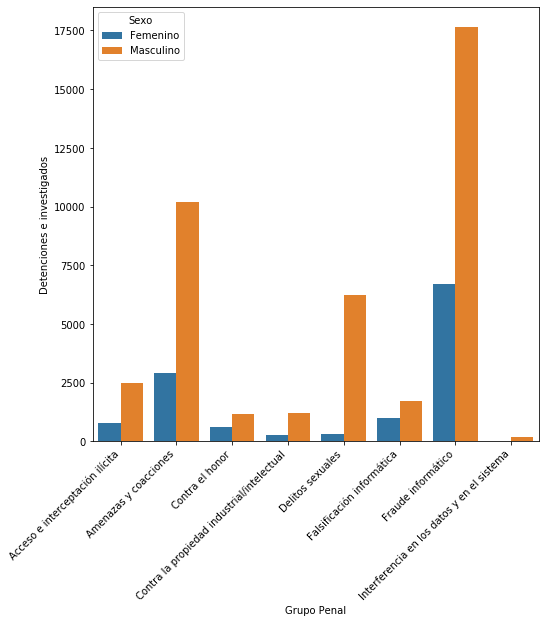

In [27]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="Grupo Penal", y="Detenciones e investigados", hue="Sexo", data=totales2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')
plt.show()

### Mayor detenciones e investigado en el rango de edad de 16 a 40 años periodo (2011-2019)

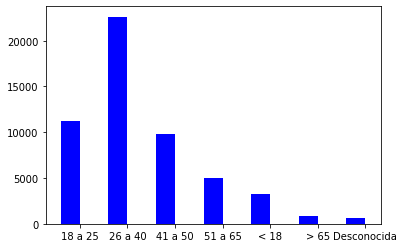

In [28]:
totales_0=df_detenc_victim[df_detenc_victim["Comunidad"]!="Total Nacional"].groupby(["Rango Edad"])["Detenciones e investigados"].sum().reset_index()

fig, ax = plt.subplots()
etiquetas= totales_0["Rango Edad"].unique()

valores=totales_0["Detenciones e investigados"]
x = np.arange(len(etiquetas)) 

ancho=0.4
plt.bar(x - ancho/2, valores, ancho, color="blue")

ax.set_xticks(x)
ax.set_xticklabels(etiquetas)

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(10)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(10)

plt.show()

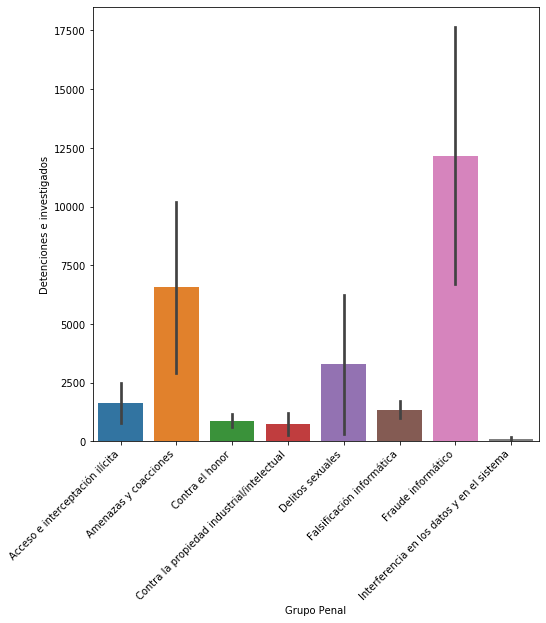

In [29]:
fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="Grupo Penal", y="Detenciones e investigados", data=totales2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,horizontalalignment='right')

plt.show()

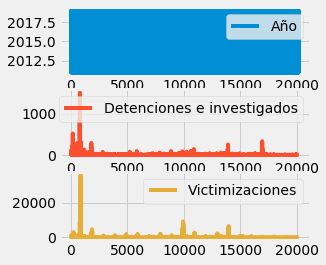

In [30]:
plt.style.use('fivethirtyeight')
df_detenc_victim.plot(subplots=True, figsize=(4, 4), sharex=False, sharey=False)
plt.show()

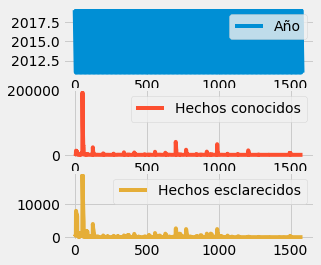

In [31]:
plt.style.use('fivethirtyeight')
df_conocidos_esclarecidos.plot(subplots=True, figsize=(4, 4), sharex=False, sharey=False)
plt.show()

## PREDICCIONES:
### Durante esta etapa del trabajo se utilizaron varios métodos de predicción tales como:
#### 	Regresión lineal
#### 	Regresión de árboles de decisión
#### 	Regresión Polinomial
#### Este último será el que mejor se ha ajustado a las necesidades del trabajo y los datos a continuación serán mostrados sus análisis


## Regresión Polinomial

In [32]:
df_corre_vict = pd.read_csv(r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\02_DETENCIONES_VICTIMIZACIONES_PENAL.csv")
df_corre_vict= df_corre_vict[df_corre_vict["Comunidad"]!="Total Nacional"].groupby(["Año"])["Victimizaciones"].sum().reset_index()

## Victimizaciones
### Grado 4
### Prediccion del año 2019

w_1:  [[ 0.00000000e+00  1.42904534e+03  7.16857792e+05 -4.75347943e+02
   8.86508706e-02]]
w_0:  [-4.83064712e+11]


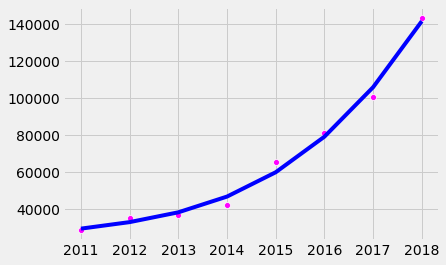

array([[187644.77636719]])

In [33]:
X = np.asanyarray(df_corre_vict[['Año']])
y = np.asanyarray(df_corre_vict[['Victimizaciones']])
X_train = X[:-1]
y_train = y[:-1]
X_test = np.array([2019]).reshape(1, -1)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
regresion_poly = linear_model.LinearRegression()
regresion_poly.fit(X_train_poly, y_train)
print ('w_1: ', regresion_poly.coef_)
print ('w_0: ',regresion_poly.intercept_)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
plt.plot(X_train, regresion_poly.coef_[0][1]*X_train + (regresion_poly.coef_[0][2]*X_train**2)+(regresion_poly.coef_[0][3]*X_train**3)+(regresion_poly.coef_[0][4]*X_train**4)+ regresion_poly.intercept_[0], '-b')
plt.show()
X_test_poly = poly.fit_transform(X_test)
X_test_poly
yhat = regresion_poly.predict(X_test_poly)
yhat

### Grado 4
### Prediccion del año 2020

w_1:  [[ 0.00000000e+00  1.15303532e+03  9.94404109e+05 -6.59079519e+02
   1.22858618e-01]]
w_0:  [-6.70721022e+11]


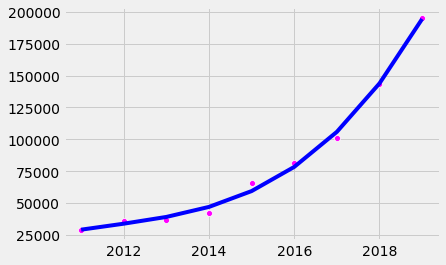

array([[259383.17980957]])

In [34]:
X = np.asanyarray(df_corre_vict[['Año']])
y = np.asanyarray(df_corre_vict[['Victimizaciones']])
X_train = X
y_train = y
X_test = np.array([2020]).reshape(1, -1)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
regresion_poly = linear_model.LinearRegression()
regresion_poly.fit(X_train_poly, y_train)
print ('w_1: ', regresion_poly.coef_)
print ('w_0: ',regresion_poly.intercept_)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
plt.plot(X_train, regresion_poly.coef_[0][1]*X_train + (regresion_poly.coef_[0][2]*X_train**2)+(regresion_poly.coef_[0][3]*X_train**3)+(regresion_poly.coef_[0][4]*X_train**4)+ regresion_poly.intercept_[0], '-b')
plt.show()
X_test_poly = poly.fit_transform(X_test)
X_test_poly
yhat = regresion_poly.predict(X_test_poly)
yhat

### Para el año 2020 se predice que abran 259383 victimizaciones unas 63937 más con respecto al año 2019

## Detenciones e investigados
### Grado 4
### PREDICCION DEL AÑO 2019

In [35]:
df1_corre_detenciones = pd.read_csv(r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\02_DETENCIONES_VICTIMIZACIONES_PENAL.csv")
df1_corre_detenciones= df1_corre_detenciones[df1_corre_detenciones["Comunidad"]!="Total Nacional"].groupby(["Año"])["Detenciones e investigados"].sum().reset_index()

w_1:  [[ 0.00000000e+00  6.60427052e+01  3.31292692e+04 -2.19383271e+01
   4.08590152e-03]]
w_0:  [-2.23850396e+10]


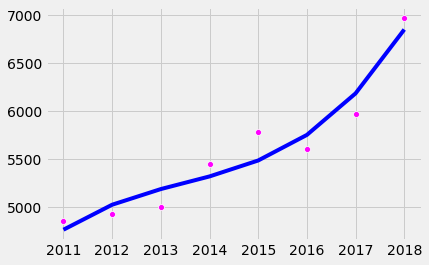

array([[7817.02959442]])

In [36]:
X = np.asanyarray(df1_corre_detenciones[['Año']])
y = np.asanyarray(df1_corre_detenciones[['Detenciones e investigados']])
X_train = X[:-1]
y_train = y[:-1]
X_test = np.array([2019]).reshape(1, -1)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
regresion_poly = linear_model.LinearRegression()
regresion_poly.fit(X_train_poly, y_train)
print ('w_1: ', regresion_poly.coef_)
print ('w_0: ',regresion_poly.intercept_)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
plt.plot(X_train, regresion_poly.coef_[0][1]*X_train + (regresion_poly.coef_[0][2]*X_train**2)+(regresion_poly.coef_[0][3]*X_train**3)+(regresion_poly.coef_[0][4]*X_train**4)+ regresion_poly.intercept_[0], '-b')
plt.show()
X_test_poly = poly.fit_transform(X_test)
X_test_poly
yhat = regresion_poly.predict(X_test_poly)
yhat

### Grado 4
### Prediccion del año 2020

w_1:  [[ 0.00000000e+00  8.36669418e+01  7.21562896e+04 -4.77736540e+01
   8.89600823e-03]]
w_0:  [-4.87722835e+10]


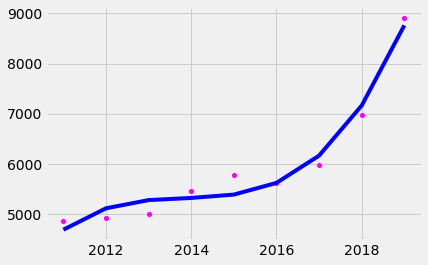

array([[11097.68065643]])

In [37]:
X = np.asanyarray(df1_corre_detenciones[['Año']])
y = np.asanyarray(df1_corre_detenciones[['Detenciones e investigados']])
X_train = X
y_train = y
X_test = np.array([2020]).reshape(1, -1)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
regresion_poly = linear_model.LinearRegression()
regresion_poly.fit(X_train_poly, y_train)
print ('w_1: ', regresion_poly.coef_)
print ('w_0: ',regresion_poly.intercept_)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
plt.plot(X_train, regresion_poly.coef_[0][1]*X_train + (regresion_poly.coef_[0][2]*X_train**2)+(regresion_poly.coef_[0][3]*X_train**3)+(regresion_poly.coef_[0][4]*X_train**4)+ regresion_poly.intercept_[0], '-b')
plt.show()
X_test_poly = poly.fit_transform(X_test)
X_test_poly
yhat = regresion_poly.predict(X_test_poly)
yhat

### Para el año 2020 se predice que abran 11097 victimizaciones unas 2183 más con respecto al año 2019

## Hechos esclarecidos 
### Grado 4
### PREDICCION DEL AÑO 2019

In [38]:
df_corre_hecho_esclareci = pd.read_csv(r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\02_HECHOS_CONOCIDOS_ESCLARECIDOS_PENAL.csv")
df_corre_hecho_esclareci= df_corre_hecho_esclareci[df_corre_hecho_esclareci["Comunidad"]!="Total Nacional"].groupby(["Año"])["Hechos esclarecidos"].sum().reset_index()

w_1:  [[ 0.00000000e+00  4.06555492e+01  3.50622781e+04 -2.32418246e+01
   4.33308685e-03]]
w_0:  [-2.36440066e+10]


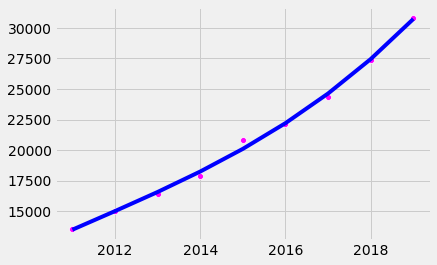

array([[30728.15638733]])

In [39]:
X = np.asanyarray(df_corre_hecho_esclareci[['Año']])
y = np.asanyarray(df_corre_hecho_esclareci[["Hechos esclarecidos"]])
X_train = X
y_train = y
X_test = np.array([2019]).reshape(1, -1)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
regresion_poly = linear_model.LinearRegression()
regresion_poly.fit(X_train_poly, y_train)
print ('w_1: ', regresion_poly.coef_)
print ('w_0: ',regresion_poly.intercept_)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
plt.plot(X_train, regresion_poly.coef_[0][1]*X_train + (regresion_poly.coef_[0][2]*X_train**2)+(regresion_poly.coef_[0][3]*X_train**3)+(regresion_poly.coef_[0][4]*X_train**4)+ regresion_poly.intercept_[0], '-b')
plt.show()
X_test_poly = poly.fit_transform(X_test)
X_test_poly
yhat = regresion_poly.predict(X_test_poly)
yhat

### Grado 4
### Prediccion del año 2020

w_1:  [[ 0.00000000e+00  4.06555492e+01  3.50622781e+04 -2.32418246e+01
   4.33308685e-03]]
w_0:  [-2.36440066e+10]


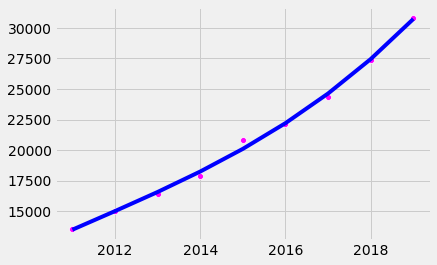

array([[34538.0098877]])

In [40]:
X = np.asanyarray(df_corre_hecho_esclareci[['Año']])
y = np.asanyarray(df_corre_hecho_esclareci[["Hechos esclarecidos"]])
X_train = X
y_train = y
X_test = np.array([2020]).reshape(1, -1)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
regresion_poly = linear_model.LinearRegression()
regresion_poly.fit(X_train_poly, y_train)
print ('w_1: ', regresion_poly.coef_)
print ('w_0: ',regresion_poly.intercept_)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
plt.plot(X_train, regresion_poly.coef_[0][1]*X_train + (regresion_poly.coef_[0][2]*X_train**2)+(regresion_poly.coef_[0][3]*X_train**3)+(regresion_poly.coef_[0][4]*X_train**4)+ regresion_poly.intercept_[0], '-b')
plt.show()
X_test_poly = poly.fit_transform(X_test)
X_test_poly
yhat = regresion_poly.predict(X_test_poly)
yhat

### Para el año 2020 se predice que abran 34538 victimizaciones unas 3697 más con respecto al año 2019

## Hechos conocidos
### Grado 4
### PREDICCION DEL AÑO 2019

In [41]:
df1_corre_hecho_conocido = pd.read_csv(r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\02_HECHOS_CONOCIDOS_ESCLARECIDOS_PENAL.csv")
df1_corre_hecho_conocido= df1_corre_hecho_conocido[df1_corre_hecho_conocido["Comunidad"]!="Total Nacional"].groupby(["Año"])["Hechos conocidos"].sum().reset_index()

w_1:  [[ 0.00000000e+00  5.78382814e+02  2.90136509e+05 -1.92967525e+02
   3.60955841e-02]]
w_0:  [-1.94336204e+11]


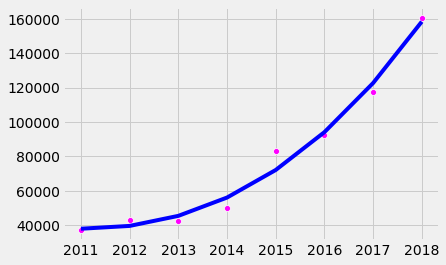

array([[201820.92590332]])

In [42]:
X = np.asanyarray(df1_corre_hecho_conocido[['Año']])
y = np.asanyarray(df1_corre_hecho_conocido[['Hechos conocidos']])
X_train = X[:-1]
y_train = y[:-1]
X_test = np.array([2019]).reshape(1, -1)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
regresion_poly = linear_model.LinearRegression()
regresion_poly.fit(X_train_poly, y_train)
print ('w_1: ', regresion_poly.coef_)
print ('w_0: ',regresion_poly.intercept_)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
plt.plot(X_train, regresion_poly.coef_[0][1]*X_train + (regresion_poly.coef_[0][2]*X_train**2)+(regresion_poly.coef_[0][3]*X_train**3)+(regresion_poly.coef_[0][4]*X_train**4)+ regresion_poly.intercept_[0], '-b')
plt.show()
X_test_poly = poly.fit_transform(X_test)
X_test_poly
yhat = regresion_poly.predict(X_test_poly)
yhat

### Grado 4
### Prediccion del año 2020

w_1:  [[ 0.00000000e+00  1.01630465e+03  8.76484437e+05 -5.81121474e+02
   1.08363374e-01]]
w_0:  [-5.9078237e+11]


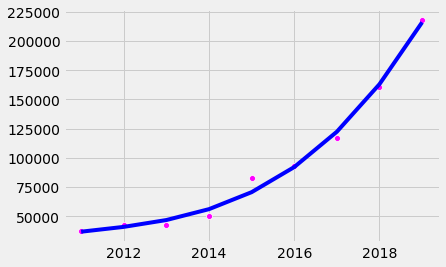

[[282912.34545898]]


In [43]:
X = np.asanyarray(df1_corre_hecho_conocido[['Año']])
y = np.asanyarray(df1_corre_hecho_conocido[['Hechos conocidos']])
X_train = X
y_train = y
X_test = np.array([2020]).reshape(1, -1)
poly = PolynomialFeatures(degree=4)
X_train_poly = poly.fit_transform(X_train)
regresion_poly = linear_model.LinearRegression()
regresion_poly.fit(X_train_poly, y_train)
print ('w_1: ', regresion_poly.coef_)
print ('w_0: ',regresion_poly.intercept_)
sns.scatterplot(X_train.flatten(),y_train.flatten(), color="magenta") #entrenamiento
plt.plot(X_train, regresion_poly.coef_[0][1]*X_train + (regresion_poly.coef_[0][2]*X_train**2)+(regresion_poly.coef_[0][3]*X_train**3)+(regresion_poly.coef_[0][4]*X_train**4)+ regresion_poly.intercept_[0], '-b')
plt.show()
X_test_poly = poly.fit_transform(X_test)
X_test_poly
yhat = regresion_poly.predict(X_test_poly)
print(yhat)

### Para el año 2020 se predice que abran 282912 victimizaciones unas 64610 más con respecto al año 2019

## Regresion Lineal

In [44]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot

In [45]:
data = pd.read_csv(r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\02_DETENCIONES_VICTIMIZACIONES_PENAL.csv")
data_00= data[data["Comunidad"]!="Total Nacional"].groupby(["Año"])["Detenciones e investigados"].sum().reset_index()

## Detenciones e investigados

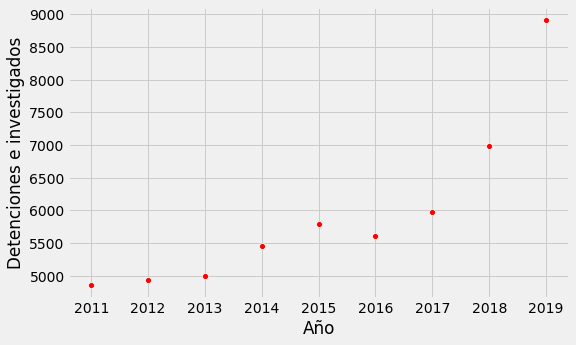

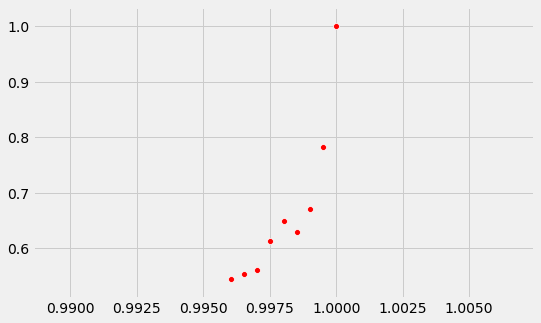

 beta_1 = 392.906035, beta_2 = 0.996188


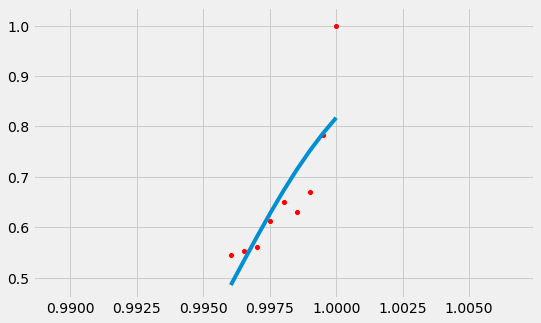

In [46]:
plt.figure(figsize=(8,5))
sns.scatterplot(data_00["Año"], data_00["Detenciones e investigados"], color="r")
plt.show()

X = data_00["Año"].values
y = data_00["Detenciones e investigados"].values
data_00["Año"].describe()
X_norm =X/max(X)
Y_norm =y/max(y)
plt.figure(figsize=(8,5))
sns.scatterplot(X_norm, Y_norm, color="r")
plt.show()
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, X_norm, Y_norm)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
plt.figure(figsize=(8,5))
sns.scatterplot(X_norm, Y_norm, color="r")

beta_1 = 392.906035
beta_2 = 0.996188

Y_pred = sigmoid(X_norm, beta_1,beta_2)
plt.plot(X_norm, Y_pred)
plt.show()

In [47]:
sigmoid(1.00049529, beta_1,beta_2)

0.8445343016849483

In [48]:
8914.0 * 0.9182763438877961/1

8185.515329415814

### Se predice para el año 2020, las  detenciones e investigados seran de 8185

## Victimizaciones

In [76]:
data_vic = pd.read_csv(r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\02_DETENCIONES_VICTIMIZACIONES_PENAL.csv")
data_vic_00= data_vic[data_vic["Comunidad"]!="Total Nacional"].groupby(["Año"])["Victimizaciones"].sum().reset_index()

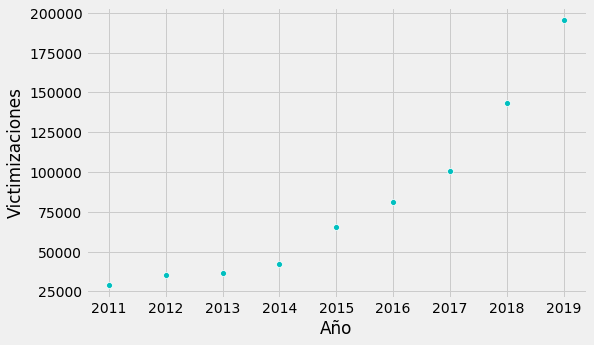

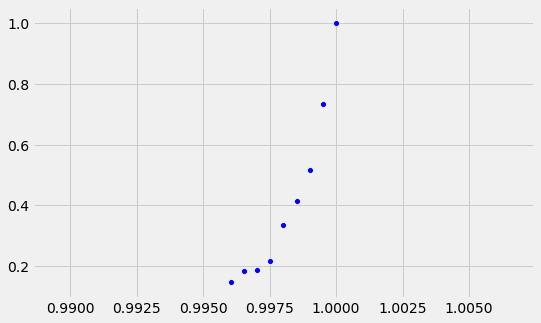

 beta_1 = 1087.950155, beta_2 = 0.998597


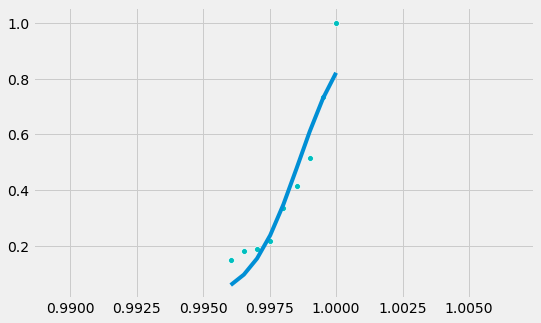

In [50]:
plt.figure(figsize=(8,5))
sns.scatterplot(data_vic_00["Año"], data_vic_00["Victimizaciones"], color="c")
plt.show()

X = data_vic_00["Año"].values
y = data_vic_00["Victimizaciones"].values
data_vic_00["Año"].describe()
X_norm =X/max(X)
Y_norm =y/max(y)
plt.figure(figsize=(8,5))
sns.scatterplot(X_norm, Y_norm, color="b")
plt.show()
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, X_norm, Y_norm)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
plt.figure(figsize=(8,5))
sns.scatterplot(X_norm, Y_norm, color="c")

beta_1 = 1087.950155
beta_2 = 0.998597

Y_pred = sigmoid(X_norm, beta_1,beta_2)
plt.plot(X_norm, Y_pred)
plt.show()

In [51]:
sigmoid(1.00049529, beta_1,beta_2)

0.8874789911652049

In [52]:
195446.0 * 0.883/1

172578.818

### Se predice para el año 2020, las  Victimizaciones seran de 172578

## Hechos conocidos

In [53]:
data_hecho_01 = pd.read_csv(r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\02_HECHOS_CONOCIDOS_ESCLARECIDOS_PENAL.csv")
data_conoci_00= data_hecho_01[data_hecho_01["Comunidad"]!="Total Nacional"].groupby(["Año"])["Hechos conocidos"].sum().reset_index()

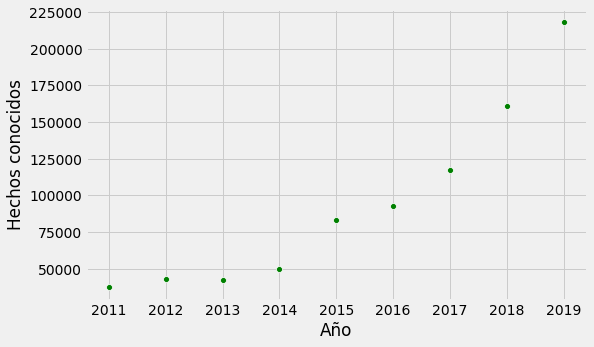

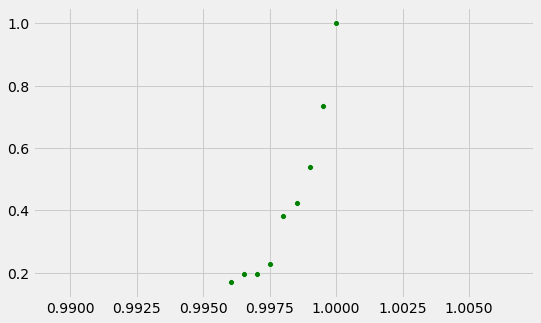

 beta_1 = 1025.392282, beta_2 = 0.998519


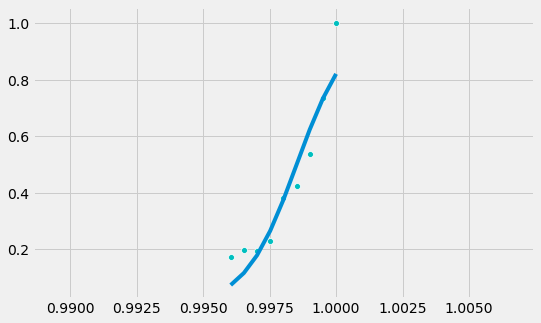

In [54]:
plt.figure(figsize=(8,5))
sns.scatterplot(data_conoci_00["Año"], data_conoci_00["Hechos conocidos"], color="green")
plt.show()

X = data_conoci_00["Año"].values
y = data_conoci_00["Hechos conocidos"].values
data_conoci_00["Año"].describe()
X_norm =X/max(X)
Y_norm =y/max(y)
plt.figure(figsize=(8,5))
sns.scatterplot(X_norm, Y_norm, color="green")
plt.show()
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, X_norm, Y_norm)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

plt.figure(figsize=(8,5))
sns.scatterplot(X_norm, Y_norm, color="c")

beta_1 = 1025.392282
beta_2 = 0.998519

Y_pred = sigmoid(X_norm, beta_1,beta_2)
plt.plot(X_norm, Y_pred)
plt.show()


In [55]:
sigmoid(1.00049529, beta_1,beta_2)

0.8835486239573357

In [56]:
218302.0 * 0.883/1

192760.666

### Se predice para el año 2020, los hechos conocidos seran de 192760

## Hechos esclarecidos

In [57]:
data_hecho_02 = pd.read_csv(r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\02_HECHOS_CONOCIDOS_ESCLARECIDOS_PENAL.csv")
data_esclare_00= data_hecho_02[data_hecho_02["Comunidad"]!="Total Nacional"].groupby(["Año"])["Hechos esclarecidos"].sum().reset_index()

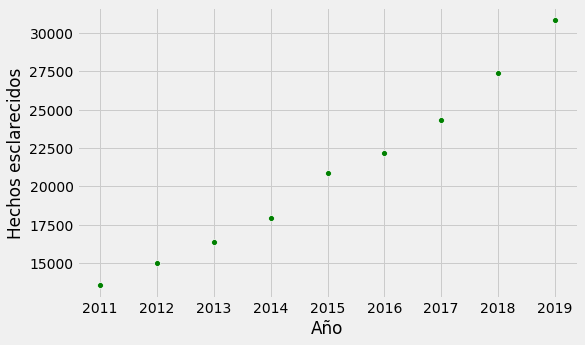

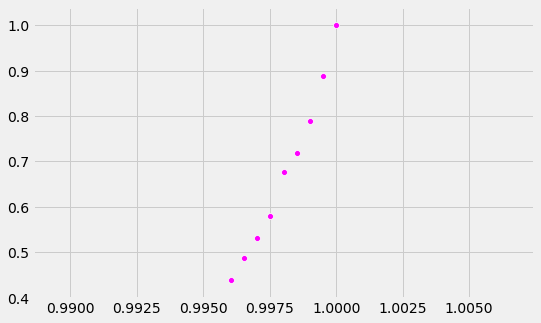

 beta_1 = 641.296100, beta_2 = 0.996723


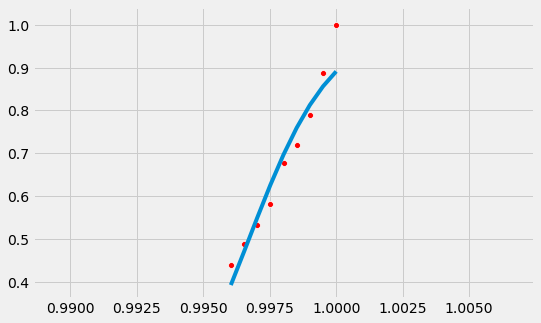

In [58]:
plt.figure(figsize=(8,5))
sns.scatterplot(data_esclare_00["Año"], data_esclare_00["Hechos esclarecidos"], color="green")
plt.show()
X = data_esclare_00["Año"].values
y = data_esclare_00["Hechos esclarecidos"].values
data_esclare_00["Año"].describe()
X_norm =X/max(X)
Y_norm =y/max(y)
plt.figure(figsize=(8,5))
sns.scatterplot(X_norm, Y_norm, color="magenta")
plt.show()
def sigmoid(x, Beta_1, Beta_2):
    y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
    return y
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, X_norm, Y_norm)
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))
plt.figure(figsize=(8,5))
sns.scatterplot(X_norm, Y_norm, color="r")

beta_1 = 641.296100
beta_2 = 0.996723

Y_pred = sigmoid(X_norm, beta_1,beta_2)
plt.plot(X_norm, Y_pred)
plt.show()


In [59]:
sigmoid(1.00049529, beta_1,beta_2)

0.9182763438877961

In [60]:
30841.0 * 0.918/1

28312.038

### Se predice para el año 2020, los hechos esclarecidos seran de 28312

## Regresión de árboles de decisión

## Detenciones e investigados

In [61]:
data = pd.read_csv(r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\02_DETENCIONES_VICTIMIZACIONES_PENAL.csv")
data_detenciones= data[data["Comunidad"]!="Total Nacional"].groupby(["Año"])["Detenciones e investigados"].sum().reset_index()

In [62]:
X = np.array(data_detenciones["Año"].astype(int))
X= X.reshape(-1,1)
y = np.array(data_detenciones["Detenciones e investigados"].astype(int))
clf = tree.DecisionTreeRegressor(random_state = 0)
clf.fit(X, y)
clf.predict(np.array([[2020]]))

array([8914.])

### Se predice para el año 2020 en detenciones e investigados  8914 casos

## Victimizaciones

In [63]:
data = pd.read_csv(r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\02_DETENCIONES_VICTIMIZACIONES_PENAL.csv")
data_vistimizaciones= data[data["Comunidad"]!="Total Nacional"].groupby(["Año"])["Victimizaciones"].sum().reset_index()

In [64]:
X = np.array(data_vistimizaciones["Año"].astype(int))
X= X.reshape(-1,1)
y = np.array(data_vistimizaciones["Victimizaciones"].astype(int))
clf = tree.DecisionTreeRegressor(random_state = 0)
clf.fit(X, y)
clf.predict(np.array([[2020]]))

array([195446.])

### Se predice para el año 2020 que los Victimizaciones seran de   195446 casos

## Hechos conocidos

In [65]:
data = pd.read_csv(r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\02_HECHOS_CONOCIDOS_ESCLARECIDOS_PENAL.csv")
data_h_conocidos= data[data["Comunidad"]!="Total Nacional"].groupby(["Año"])["Hechos conocidos"].sum().reset_index()

In [66]:
X = np.array(data_h_conocidos["Año"].astype(int))
X= X.reshape(-1,1)
y = np.array(data_h_conocidos["Hechos conocidos"].astype(int))
clf = tree.DecisionTreeRegressor(random_state = 0)
clf.fit(X, y)
clf.predict(np.array([[2020]]))

array([218302.])

### Se predice para el año 2020 que los Hechos conocidos seran de   218302 casos

## Hechos esclarecidos

In [67]:
data = pd.read_csv(r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\02_HECHOS_CONOCIDOS_ESCLARECIDOS_PENAL.csv")
data_h_esclarecidos= data[data["Comunidad"]!="Total Nacional"].groupby(["Año"])["Hechos esclarecidos"].sum().reset_index()

In [68]:
X = np.array(data_h_esclarecidos["Año"].astype(int))
X= X.reshape(-1,1)
y = np.array(data_h_esclarecidos["Hechos esclarecidos"].astype(int))
clf = tree.DecisionTreeRegressor(random_state = 0)
clf.fit(X, y)
clf.predict(np.array([[2020]]))

array([30841.])

### Se predice para el año 2020 que los Hechos esclarecidos seran de   30841 casos

## Mapa España muestra las Detenciones e investigados en sus comunidades 

In [69]:
comunidades_X = {"Andalucía":37.463274379, 
                "Aragón":41.5195355493, 
               "Asturias":43.292357861, 
               "Baleares":39.5751889864,  
               "Canarias":28.339798593, 
               "Cantabria":43.1975195366,
               "Castilla y León":41.7543962127, 
               "Castilla - La Mancha":39.5809896328, 
               "Cataluña":41.7985537834, 
               "Comunidad Valenciana":39.4015584598, 
               "Extremadura":39.1914992537,
               "Galicia":42.7567966298, 
               "Comunidad de Madrid":40.495082963, 
               "Murcia":38.0023679133,
               "Navarra":42.6672011468, 
               "País Vasco":43.0433630599, 
               "La Rioja":42.2748733608, 
               "Ceuta":35.8934069863, 
               "Melilla":35.2908279949}

comunidades_Y = {"Andalucía":-4.5756251361,
                "Aragón":-0.659846411976,
               "Asturias":-5.99350932547, 
               "Baleares":2.91229172079, 
               "Canarias":-15.6720984172, 
               "Cantabria": -4.03001213183,  
               "Castilla y León":-4.78188694026, 
               "Castilla - La Mancha": -3.00462777209, 
               "Cataluña":1.52905348544, 
               "Comunidad Valenciana": -0.554726732459, 
               "Extremadura": -6.15082693044,  
               "Galicia": -7.91056344066, 
               "Comunidad de Madrid": -3.71704006617, 
               "Murcia": -1.48575857531, 
               "Navarra":-1.6461117688, 
               "País Vasco":-2.61681792149, 
               "La Rioja": -2.51703983986, 
               "Ceuta":-5.34342403891, 
               "Melilla":-2.95053552337}

In [70]:
df_coodenadas=pd.DataFrame({"longitud":comunidades_X,"latitud":comunidades_Y})
df_coodenadas.reset_index(inplace= True)
df_coodenadas.rename(columns={"index":"Comunidad"}, inplace= True)

df_data_det = df_detenc_victim[df_detenc_victim["Comunidad"]!="Total Nacional"]
df_data_con = df_conocidos_esclarecidos[df_conocidos_esclarecidos["Comunidad"]!="Total Nacional"]

df_mapa_det = df_data_det.groupby(["Comunidad"])["Detenciones e investigados"].sum().reset_index()
df_mapa_vic = df_data_det.groupby(["Comunidad"])["Victimizaciones"].sum().reset_index()

df_mapa_con = df_data_con.groupby(["Comunidad"])["Hechos conocidos"].sum().reset_index()
df_mapa_esc = df_data_con.groupby(["Comunidad"])["Hechos esclarecidos"].sum().reset_index()

df_mapa = pd.merge(df_mapa_det, df_mapa_vic, on=["Comunidad"]).reset_index(drop=True)
df_mapa2 = pd.merge(df_mapa_con, df_mapa_esc, on=["Comunidad"]).reset_index(drop=True)

df_mapa_mostrar = pd.merge(df_mapa, df_mapa2, on=["Comunidad"]).reset_index(drop=True)

df_mapa_mostrar = pd.merge(df_mapa_mostrar, df_coodenadas, on=["Comunidad"])

df_mapa_mostrar.head()

,Comunidad,Detenciones e investigados,Victimizaciones,Hechos conocidos,Hechos esclarecidos,longitud,latitud
0,Andalucía,11050.0,118196.0,122603.0,42587.0,37.463274,-4.575625
1,Aragón,1636.0,19979.0,21467.0,5424.0,41.519536,-0.659846
2,Asturias,1329.0,17937.0,16015.0,4830.0,43.292358,-5.993509
3,Baleares,999.0,29853.0,30823.0,5078.0,39.575189,2.912292
4,Canarias,3656.0,35273.0,33027.0,11085.0,28.339799,-15.672098


In [71]:
latitude = 37.463274
longitude = -4.575625
es_map = folium.Map(location=[latitude, longitude], zoom_start=5)

In [72]:
def datos_anuales_x_comunidad(comunidad):
    df_x_comunidad_det = df_detenc_victim[df_detenc_victim["Comunidad"] == comunidad].groupby("Año")["Detenciones e investigados", "Victimizaciones"].sum().reset_index()
    df_x_comunidad_conoc = df_conocidos_esclarecidos[df_conocidos_esclarecidos["Comunidad"] == comunidad].groupby("Año")["Hechos conocidos", "Hechos esclarecidos"].sum().reset_index()
    df_anuales = pd.merge(df_x_comunidad_det, df_x_comunidad_conoc, on=["Año"])
    return df_anuales.set_index("Año")

def grafico(comunidad):
    datos = datos_anuales_x_comunidad(comunidad)
    line = vin.GroupedBar(datos, width=400, height=200)
    line.axis_titles(x='Año', y='Total')
    line.legend(title=comunidad)
    return line
    

In [73]:
import math
max_hechos_conocidos = df_mapa_mostrar["Hechos conocidos"].max()
min_hechos_conocidos = df_mapa_mostrar["Hechos conocidos"].mean()
max_radio = 18
min_radio = 14

def calc_radio(valor):
    calc = math.ceil(max_radio * valor / max_hechos_conocidos)
    if calc <= 10:
        calc = math.ceil(min_radio * valor / min_hechos_conocidos)
        if calc <= 2:
            calc = calc * 7
    return calc

for lat, lng, label, hechos in zip(df_mapa_mostrar.latitud, df_mapa_mostrar.longitud, df_mapa_mostrar.Comunidad, df_mapa_mostrar["Hechos conocidos"]):
    radio = calc_radio(hechos)
    popup = folium.Popup()
    folium.Vega(grafico(label), height=250, width=600).add_to(popup)
    folium.CircleMarker(
            [lng, lat],
            radius=radio,
            weight=1,
            color='#3186cc',
            fill_color='#3186cc',
            fill_opacity=0.6,
            fill=True,
            popup=popup
        ).add_to(es_map)    
es_map

C:\Users\Jessye Pedraja\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  
C:\Users\Jessye Pedraja\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
df_mapa_mostrar2 = df_mapa_mostrar.groupby(["Comunidad"])["Detenciones e investigados"].sum().reset_index()

esp_map2 = fol.Map(location=[latitude, longitude], zoom_start=5)

fol.Choropleth(
    geo_data=r"C:\Users\Jessye Pedraja\Desktop\NEOLAND\curso\TRABAJO_FINAL_CRIMENES\CIBERCRIMEN\comunidades-autonomas-espanolas.geojson",
    name='Detenciones e investigados',
    data=df_mapa_mostrar2,
    columns=['Comunidad', 'Detenciones e investigados'],
    key_on='properties.comunidade_autonoma',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Detenciones e investigados'
     
).add_to(esp_map2)

fol.LayerControl().add_to(esp_map2)

esp_map2